In [1]:
import csv
import sqlite3
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# change to 'sqlite:///your_filename.db'
con = sqlite3.connect("owid-covid-data.db")
cur = con.cursor()
df=pd.read_csv('owid-covid-data.csv',sep=',')
df.to_sql('CovidDataBase', con, if_exists='append', index=False)

In [82]:
def sql_fetch(con):

    cur.execute('SELECT name from sqlite_master where type= "table"')

    print(cur.fetchall())

sql_fetch(con)

[('owid-covid-data.csv',), ('CovidDataBase',)]


In [3]:
df = pd.read_sql_query("SELECT * from CovidDataBase", con)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259249,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
259250,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
259251,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
259252,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


1. How many countries are included in our data set?

2. When was the most recent entry?

3. What country had the highest single day deaths per million? 

4. Select any country. How many times have the deaths per million exceeded 1,000 in one day? 

5. Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

6. Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?

7. Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

BONUS

Plot deaths per million for one country. Find Google's mobility for that country. Determine if lockdowns for that country have influenced 
deaths per million (changed the shape of the curve). Remember, you have have to create a lagged variable to account for time from
infection to death (median time ~ 15 days). Therefore, any change in policy ("lockdown") would take ~15 days to see an effect

Plot cases per million for a given country. Look up when masks became mandatory in that country. Did this implementation of this anti-social
and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?)

In [37]:
# How many countries are included in our data set?
nb_countries = pd.read_sql_query("""SELECT count(distinct(iso_code))as number_countries from CovidDataBase where
location not in ('Africa','Europe','Asia','North America',
'South America','Oceania','None','European Union','World')""", con)
nb_countries

,number_countries
0,211


In [5]:
# When was the most recent entry?
#check of sql columns type 
database_structure=pd.read_sql_query("pragma table_info('CovidDataBase')",con);
database_structure


,cid,name,type,notnull,dflt_value,pk
0,0,iso_code,TEXT,0,None,0
1,1,continent,TEXT,0,None,0
2,2,location,TEXT,0,None,0
3,3,date,TEXT,0,None,0
4,4,total_cases,REAL,0,None,0
5,5,new_cases,REAL,0,None,0
6,6,new_cases_smoothed,REAL,0,None,0
7,7,total_deaths,REAL,0,None,0
8,8,new_deaths,REAL,0,None,0
9,9,new_deaths_smoothed,REAL,0,None,0


In [6]:
# When was the most recent entry?
#convert date into datetime format
recent_entry= pd.read_sql_query("SELECT Distinct(iso_code),continent,location, date total_cases from CovidDataBase order by date desc limit 1",con)
recent_entry

,iso_code,continent,location,total_cases
0,AFG,Asia,Afghanistan,2021-05-06


In [7]:
#What country had the highest single day deaths per million? 
total_death_per_million=pd.read_sql_query("select location,date, max(new_deaths_per_million)as maximum_death_per_million from CovidDataBase",con)
total_death_per_million

,location,date,maximum_death_per_million
0,Ecuador,2020-09-07,218.329


In [8]:
#Select any country. How many times have the deaths per million exceeded 1,000 in one day? 
hungary_death=pd.read_sql_query("select location, count(date)as number_of_days from CovidDataBase where iso_code = 'FRA' and new_deaths_per_million > 10",con)
hungary_death


,location,number_of_days
0,France,99


In [9]:
#Extract the deaths per million for US, France, and India. 
deaths_millions_FR_US_IND=pd.read_sql_query("""select location, date,total_deaths_per_million from CovidDataBase WHERE iso_code in ('FRA', 'USA','IND')""",con)
deaths_millions_FR_US_IND['date'] = deaths_millions_FR_US_IND['date'].astype('datetime64[ns]')
deaths_millions_FR_US_IND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   location                  4209 non-null   object        
 1   date                      4209 non-null   datetime64[ns]
 2   total_deaths_per_million  3906 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 98.8+ KB


<AxesSubplot:xlabel='date', ylabel='total_deaths_per_million'>

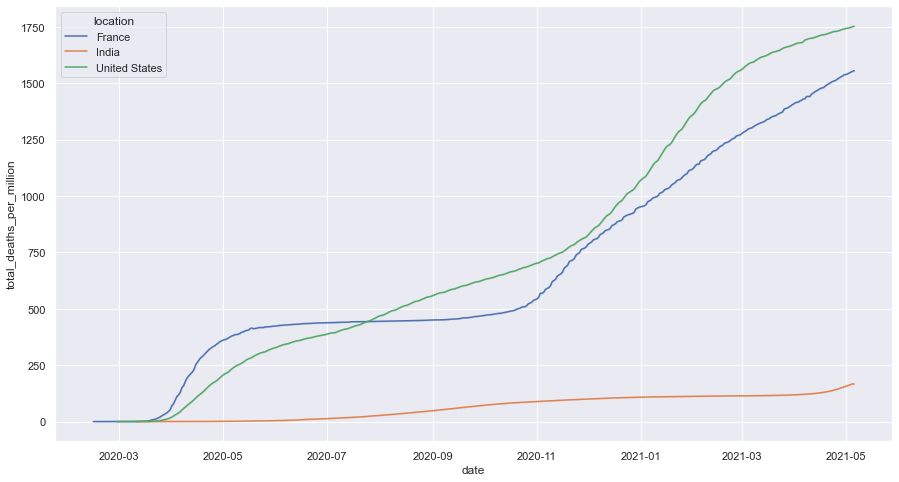

In [11]:
#Plot the time series data and compare results to what the media is currently saying
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15,8))
# Plot the death per millions for US FR IND over time 
sns.lineplot(x="date", y="total_deaths_per_million",
             hue="location", 
             data=deaths_millions_FR_US_IND)

<a> <img src = "canvas.png" width = 400, align = "center"></a>

inde : médias actuellement disent que tout va mal alors qu'ils sont à moins de 250 morts par million d'habitants 
il faut cependant mettre cela en perspective avec la population que comptent respectivement ces deux pays (67 millions d’habitants pour la France et 1,36 milliard en Inde) ou leur pyramide des âges (population plus jeune en Inde)
https://www.leparisien.fr/societe/covid-19-quatre-graphiques-pour-comprendre-lepidemie-en-inde-26-04-2021-JNSPCCOZPNBTLPCCO7FGWJECQQ.php
us : https://www.lemonde.fr/les-decodeurs/article/2020/05/05/coronavirus-age-mortalite-departements-pays-suivez-l-evolution-de-l-epidemie-en-cartes-et-graphiques_6038751_4355770.html

In [12]:
#Plot the deaths per million and cases per million by continent for your birthday in 2020. 
#What does the data say?

deaths_millions_continents=pd.read_sql_query("""select continent, date,total_cases_per_million,total_deaths_per_million 
from CovidDataBase  group by continent,date having date = '2020-05-15' """,con)

deaths_millions_continents

,continent,date,total_cases_per_million,total_deaths_per_million
0,None,2020-05-15,58.387,1.957
1,Africa,2020-05-15,151.171,12.223
2,Asia,2020-05-15,155.517,3.930
3,Europe,2020-05-15,318.299,10.772
4,North America,2020-05-15,255.290,30.635
5,Oceania,2020-05-15,275.884,3.843
6,South America,2020-05-15,165.480,7.877


In [13]:
death_millions2= deaths_millions_continents.drop(['date'], axis=1)

In [14]:
death_millions2 = pd.melt(death_millions2, id_vars="continent", var_name="death_or_cases", value_name="total")


In [15]:
death_millions2

,continent,death_or_cases,total
0,None,total_cases_per_million,58.387
1,Africa,total_cases_per_million,151.171
2,Asia,total_cases_per_million,155.517
3,Europe,total_cases_per_million,318.299
4,North America,total_cases_per_million,255.290
5,Oceania,total_cases_per_million,275.884
6,South America,total_cases_per_million,165.480
7,None,total_deaths_per_million,1.957
8,Africa,total_deaths_per_million,12.223
9,Asia,total_deaths_per_million,3.930


<Figure size 1080x1080 with 0 Axes>

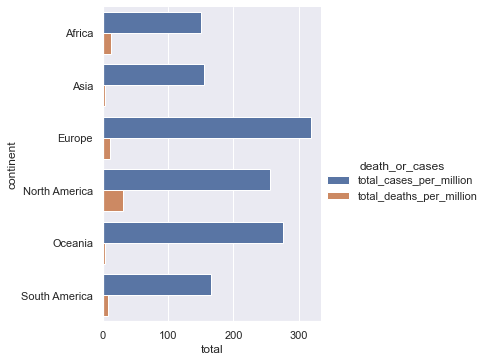

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,15))
sns.catplot(y='continent', x='total', hue='death_or_cases', data=death_millions2, kind='bar')

* we do not die a lot compared to the number of cases 

* europe has more cases per milion than the rest o fhte word but may have stronger health facilities due to a low number of death per milion

* Oceania, have a very low number of deaths == maybe we do not have a lot of information regarding death count

* it can be interesting to look at the number of beds in hospital informaion  

* look at the population structure (old/youn)

In [96]:
#Plot the lockdown stringency for each country and color the scatter points by continent. 
#Any insights?
stringency = pd.read_sql_query("""select continent, date,location,new_deaths, stringency_index
from CovidDataBase 
where location not in ('Africa','Europe','Asia','North America',
'South America','Oceania', 'World', 'European Union') and total_deaths is not null and stringency_index is not null""",con)
stringency

,continent,date,location,new_deaths,stringency_index
0,Asia,2020-03-22,Afghanistan,1.0,41.67
1,Asia,2020-03-23,Afghanistan,0.0,41.67
2,Asia,2020-03-24,Afghanistan,0.0,50.93
3,Asia,2020-03-25,Afghanistan,1.0,59.26
4,Asia,2020-03-26,Afghanistan,1.0,59.26
...,...,...,...,...,...
195394,Africa,2021-04-27,Zimbabwe,5.0,51.85
195395,Africa,2021-04-28,Zimbabwe,0.0,51.85
195396,Africa,2021-04-29,Zimbabwe,2.0,51.85
195397,Africa,2021-04-30,Zimbabwe,0.0,51.85


In [87]:
stringency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195399 entries, 0 to 195398
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   continent         195399 non-null  object 
 1   date              195399 non-null  object 
 2   location          195399 non-null  object 
 3   new_deaths        195396 non-null  float64
 4   stringency_index  195399 non-null  float64
dtypes: float64(2), object(3)
memory usage: 7.5+ MB


In [88]:
stringency['date'] = stringency['date'].astype('datetime64[ns]')

<Figure size 1080x576 with 0 Axes>

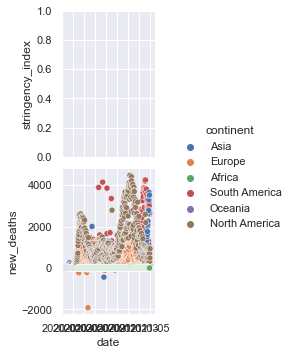

In [91]:
plt.figure(figsize=(15,8))
sns.pairplot(x_vars='date',
                y_vars=['stringency_index','new_deaths'],hue='continent',data=stringency)

<AxesSubplot:xlabel='date', ylabel='new_deaths'>

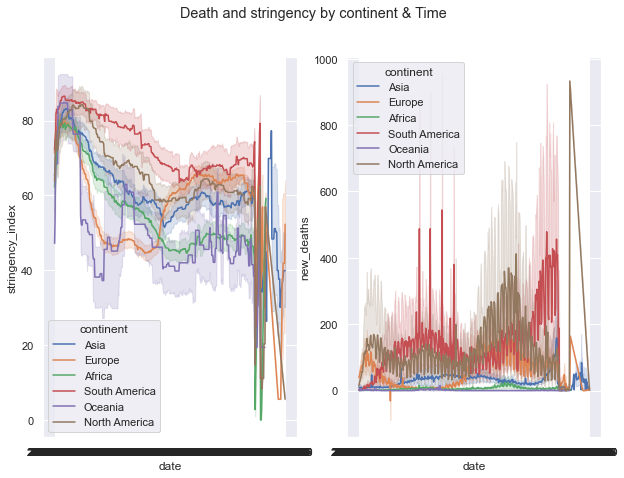

In [101]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 7))

fig.suptitle('Death and stringency by continent & Time')

sns.lineplot(ax=axes[0], data=stringency, x='date', y='stringency_index', hue= 'continent')
sns.lineplot(ax=axes[1], data=stringency, x='date', y='new_deaths', hue= 'continent')


<AxesSubplot:xlabel='date', ylabel='stringency_index'>

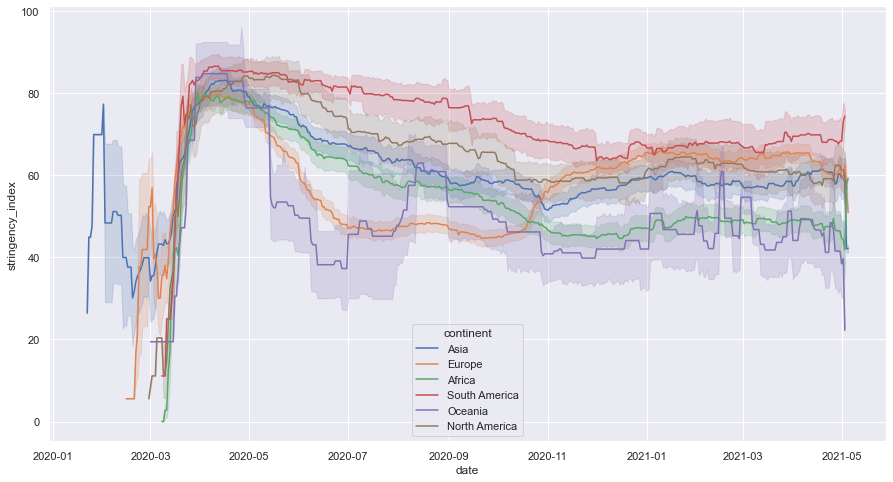

In [90]:
plt.figure(figsize=(15,8))
sns.lineplot(x="date", y="stringency_index",
             data=stringency, hue= 'continent')

BONUS

Plot deaths per million for one country. Find Google's mobility for that country. Determine if lockdowns for that country have influenced deaths per million (changed the shape of the curve). Remember, you have have to create a lagged variable to account for time from infection to death (median time ~ 15 days). Therefore, any change in policy ("lockdown") would take ~15 days to see an effect

Plot cases per million for a given country. Look up when masks became mandatory in that country. Did this implementation of this anti-social and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?)

In [84]:
mobilty=pd.read_csv('2020_FR_Region_Mobility_Report.csv',sep=',')
mobilty_2020=pd.read_csv('2021_FR_Region_Mobility_Report.csv',sep=',')
mobilty.to_sql('mobiltydatabase', con, if_exists='append', index=False)
mobilty_2020.to_sql('mobiltydatabase', con, if_exists='append', index=False)

In [85]:
mobility = pd.read_sql_query("""select * from mobiltydatabase""",con)
mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,FR,France,None,None,None,None,None,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-15,-2.0,-1.0,23.0,12.0,-2.0,-1.0
1,FR,France,None,None,None,None,None,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-16,6.0,2.0,9.0,7.0,-1.0,-1.0
2,FR,France,None,None,None,None,None,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-17,1.0,2.0,16.0,-6.0,-15.0,4.0
3,FR,France,None,None,None,None,None,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-18,5.0,2.0,36.0,-4.0,-14.0,3.0
4,FR,France,None,None,None,None,None,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-19,-4.0,-3.0,18.0,-6.0,-12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48824,FR,France,Provence-Alpes-Côte d'Azur,Vaucluse,None,FR-84,None,ChIJ4fZyISNyyhIRwCqP_aUZCAM,2021-04-29,-39.0,1.0,-9.0,-37.0,-27.0,13.0
48825,FR,France,Provence-Alpes-Côte d'Azur,Vaucluse,None,FR-84,None,ChIJ4fZyISNyyhIRwCqP_aUZCAM,2021-04-30,-38.0,16.0,-8.0,-36.0,-27.0,13.0
48826,FR,France,Provence-Alpes-Côte d'Azur,Vaucluse,None,FR-84,None,ChIJ4fZyISNyyhIRwCqP_aUZCAM,2021-05-01,-76.0,-71.0,-43.0,-47.0,-51.0,17.0
48827,FR,France,Provence-Alpes-Côte d'Azur,Vaucluse,None,FR-84,None,ChIJ4fZyISNyyhIRwCqP_aUZCAM,2021-05-02,-35.0,65.0,20.0,-33.0,-6.0,5.0


In [ ]:
mobility_death = pd.read_sql_query("""select m.date, c.new_cases,c.new_deaths, total_m.retail_and_recreation_percent_change_from_baseline 
from mobiltydatabase as m 
inner join on CovidDataBase as c
on c.date= m.date where c.location = 'France'""",con)
mobility

In [ ]:
SELECT a1, a2, b1, b2
FROM A
INNER JOIN B on B.f = A.f;

In [18]:
database_structure=pd.read_sql_query("pragma table_info('CovidDataBase')",con);
database_structure


,cid,name,type,notnull,dflt_value,pk
0,0,iso_code,TEXT,0,None,0
1,1,continent,TEXT,0,None,0
2,2,location,TEXT,0,None,0
3,3,date,TEXT,0,None,0
4,4,total_cases,REAL,0,None,0
5,5,new_cases,REAL,0,None,0
6,6,new_cases_smoothed,REAL,0,None,0
7,7,total_deaths,REAL,0,None,0
8,8,new_deaths,REAL,0,None,0
9,9,new_deaths_smoothed,REAL,0,None,0


In [ ]:
deaths_millions_continents['date'] = deaths_millions_FR_US_IND['date'].astype('datetime64[ns]')
deaths_millions_continents.info()

In [ ]:
df.head()

In [ ]:
test=pd.read_sql_query("""select * from CovidDataBase where location = 'France'""",con)
test


In [ ]:
#option2 sans pandas
con = sqlite3.connect("owid-covid-data.db")
cur = con.cursor()
cur.execute("CREATE TABLE Covid (iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index);")  # use your column names here
 
with open('owid-covid-data.csv', 'r') as fin:  # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin)  # comma is default delimiter
    to_db = [(i['col1'], i['col2']) for i in dr]

cur.executemany("INSERT INTO t (col1, col2) VALUES (?, ?);", to_db)
con.commit()
con.close()